In [1]:
import pandas as pd

# reading dataset
data = pd.read_csv("RFMid_Training_Labels.csv")

# separating features and target (assuming last column is target)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

print("Features Shape:", X.shape)
print("Labels Sample:", y[:10])


Features Shape: (1920, 46)
Labels Sample: [0 0 0 0 0 0 0 0 0 0]


In [3]:
import numpy as np
import math

# entropy calculation
def entropy_calc(values):
    unique, counts = np.unique(values, return_counts=True)
    probs = counts / len(values)
    return -sum(p * math.log2(p) for p in probs if p > 0)

# equal-width binning
def eq_bins(data, bins=4):
    min_val, max_val = min(data), max(data)
    width = (max_val - min_val) / bins
    return [min(int((x - min_val) / width), bins-1) for x in data]

# applying on dataset (first feature for demo)
col = X[:,0]  
binned = eq_bins(col, 4)
print("Entropy of first feature:", entropy_calc(binned))


Entropy of first feature: 2.0


In [5]:
# gini index calculation
def gini_calc(values):
    unique, counts = np.unique(values, return_counts=True)
    probs = counts / len(values)
    return 1 - sum(p**2 for p in probs)

print("Gini Index of labels:", gini_calc(y))


Gini Index of labels: 0.0010411241319443487


In [7]:
import numpy as np

# entropy reuse
def entropy_calc(vals):
    unique, counts = np.unique(vals, return_counts=True)
    probs = counts / len(vals)
    return -sum(p*np.log2(p) for p in probs if p > 0)

# info gain calculation
def info_gain(X, y, col):
    base = entropy_calc(y)
    values, counts = np.unique(X[:,col], return_counts=True)
    weighted = 0
    for v,c in zip(values, counts):
        subset = y[X[:,col] == v]
        weighted += (c/len(X)) * entropy_calc(subset)
    return base - weighted

# choosing root feature
def best_root(X, y):
    gains = [info_gain(X, y, i) for i in range(X.shape[1])]
    return np.argmax(gains)

print("Best Root Feature Index:", best_root(X, y))


Best Root Feature Index: 0


In [9]:
# binning function with type
def flex_binning(data, bins=4, method="equal"):
    if method == "equal":
        min_val, max_val = min(data), max(data)
        width = (max_val - min_val) / bins
        return [min(int((x - min_val) / width), bins-1) for x in data]
    elif method == "freq":
        sorted_vals = np.sort(data)
        groups = np.array_split(sorted_vals, bins)
        mapping = {}
        for i, grp in enumerate(groups):
            for val in grp:
                mapping[val] = i
        return [mapping[x] for x in data]

col = X[:,0]
print("Equal-width bins:", flex_binning(col, bins=3, method="equal")[:10])
print("Frequency bins:", flex_binning(col, bins=3, method="freq")[:10])


Equal-width bins: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Frequency bins: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [11]:
def build_tree(X, y, features):
    if len(set(y)) == 1:
        return list(y)[0]
    if len(features) == 0:
        return max(set(y), key=list(y).count)
    
    gains = [info_gain(X, y, i) for i in range(X.shape[1])]
    best = np.argmax(gains)
    
    tree = {features[best]: {}}
    for v in np.unique(X[:, best]):
        idx = X[:, best] == v
        subX = X[idx]
        subY = y[idx]
        subF = [f for i,f in enumerate(features) if i != best]
        tree[features[best]][v] = build_tree(np.delete(subX, best, axis=1), subY, subF)
    return tree

# features naming
features = [f"F{i}" for i in range(X.shape[1])]
tree = build_tree(X, y, features)
print("Decision Tree:", tree)


Decision Tree: {'F0': {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 0, 107: 0, 108: 0, 109: 0, 110: 0, 111: 0, 112: 0, 113: 0, 114: 0, 115: 0, 116: 0, 117: 0, 118: 0, 119: 0, 120: 0, 121: 0, 122: 0, 123: 0, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 0, 130: 0, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 136: 

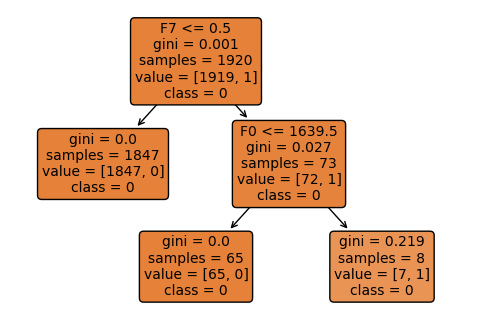

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np

def draw_simple_tree(X, y):
    # training a smaller decision tree
    clf = DecisionTreeClassifier(max_depth=2, random_state=0)  
    clf.fit(X, y)

    # drawing tree
    plt.figure(figsize=(6,4))
    plot_tree(clf, 
              filled=True, 
              feature_names=[f"F{i}" for i in range(X.shape[1])], 
              class_names=[str(c) for c in np.unique(y)],
              rounded=True,
              fontsize=10)
    plt.show()

# Call function
draw_simple_tree(X, y)


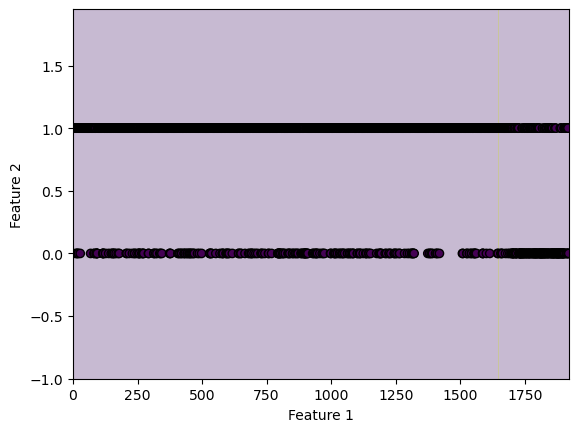

In [17]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

def boundary_plot(X, y):
    X2 = X[:,:2]  # taking only 2 features
    clf = DecisionTreeClassifier().fit(X2, y)
    x_min, x_max = X2[:,0].min()-1, X2[:,0].max()+1
    y_min, y_max = X2[:,1].min()-1, X2[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                         np.arange(y_min, y_max, 0.05))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X2[:,0], X2[:,1], c=y, edgecolor='k')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

boundary_plot(X, y)
